<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Linear-Regression-Intro" data-toc-modified-id="Linear-Regression-Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression Intro</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Simple-Regression-with-OLS" data-toc-modified-id="Simple-Regression-with-OLS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Regression with OLS</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Exploration/Cleaning" data-toc-modified-id="Data-Exploration/Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Exploration/Cleaning</a></span></li></ul></li></ul></div>

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

# Linear Regression Intro

## Assignment

1. Let's assume that you have World Bank data on financial, economic and social indicators for several countries. You want to measure the factors that affect the level of development in these countries. To this end, you decide to use per capita income as a proxy for the development level, which is defined as the national income divided by the population. You want to use some features in your dataset to predict per capita income. Is this task a classification or a regression task? Why? 

Linear regression task because the target (per cpita income) is a continous value. 

2. Which of the following arguments are false and why?
  * OLS is a special type of linear regression models 
  * Regression models become useless if they don’t meet the assumptions of linear regression. 
  * Estimation and prediction are the same thing in the context of linear regression models.
  * Linear regression is only one kind of regression model. Regression problems can also be solved with other kind of models like Support Vector Machines or Random Forests.

2a. 
False because OLS is a optimization algorithm used to find the line with the smallest summed square difference between each point and the line.

2b. False since the model can be changed to account for areas that don't meet assumptions.

2c. False because the estimation process entails finding the coefficients of the features while predictions is the process of using the trained model to predict a target outcome with an unseen sample input. 

2d. True since it is a one of kind model that is different from other regression models. 

3. Assume that your project manager wants you to discover which free services your company offers make your customers buy more of your paid services. Formulate this task as a regression problem and write down the potential outcome and features that you’d like to work on.

outcome:

total amount spent with paid services

features:
- amount of time spent on each free service
- amount of time user opens each free service

# Simple Regression with OLS

## Imports

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


## Data Exploration/Cleaning

In [4]:
housing_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
#pct null in features
pct_null = housing_df.isnull().sum() / housing_df.isnull().count()*100
pct_null[pct_null > 0]

lotfrontage     17.739726
alley           93.767123
masvnrtype       0.547945
masvnrarea       0.547945
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
electrical       0.068493
fireplacequ     47.260274
garagetype       5.547945
garageyrblt      5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
poolqc          99.520548
fence           80.753425
miscfeature     96.301370
dtype: float64

In [6]:
#create dummy variables for categorical features

for col in housing_df.columns:
    #create dummy variables for binary features
    if (housing_df[col].dtype == 'O') and (len(housing_df[col].value_counts()) == 2):
        binary_col = housing_df[col].value_counts().keys()[0]
        housing_df["is_" + binary_col] = pd.get_dummies(housing_df[col], drop_first=True)
    #create dummy variables for other multi-category features
    elif (housing_df[col].dtype == 'O') and (len(housing_df[col].value_counts()) != 2):
        housing_df = pd.concat([housing_df, pd.get_dummies(housing_df[col], prefix=col)], axis=1)

/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


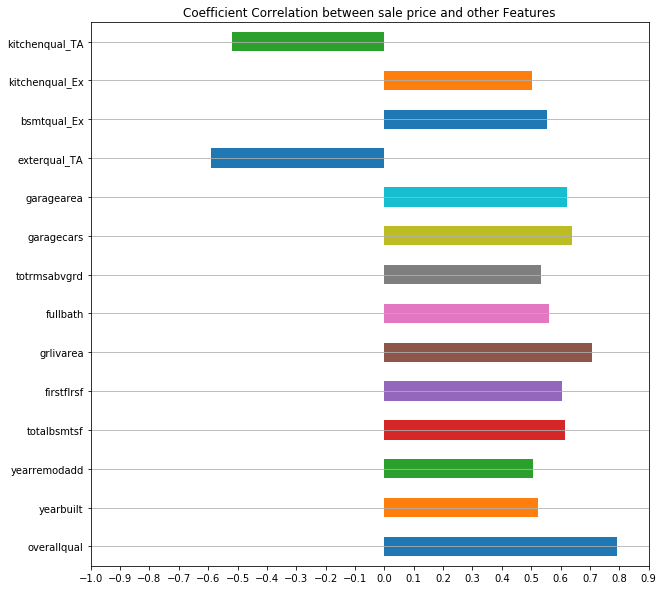

In [7]:
#plot features with coefficient correlations stronger than .5 in regards to sale price.
corr = housing_df.corr()
plot_corr = corr[(corr.saleprice > .5) | (corr.saleprice < -.5)]
plot_corr = plot_corr.saleprice
plot_corr.drop('saleprice', inplace = True)

plt.figure(figsize=(10,10))
plot_corr.plot(kind = 'barh', grid=True)
plt.grid(axis = 'x')
plt.title('Coefficient Correlation between sale price and other Features')
plt.xticks(np.arange(-1, 1, .1))
plt.show()

Features above do not contain nulls, so no further data cleaning is necessary.

In [22]:
feature_list = list(plot_corr.keys())

In [23]:
feature_list

['overallqual',
 'yearbuilt',
 'yearremodadd',
 'totalbsmtsf',
 'firstflrsf',
 'grlivarea',
 'fullbath',
 'totrmsabvgrd',
 'garagecars',
 'garagearea',
 'exterqual_TA',
 'bsmtqual_Ex',
 'kitchenqual_Ex',
 'kitchenqual_TA']

In [9]:
model = LinearRegression()

train_x, test_x, train_y, test_y = train_test_split(housing_df[feature_list], housing_df['saleprice'])

model.fit(train_x, train_y)

print('\nCoefficients: \n', model.coef_)
print('\nIntercept: \n', model.intercept_)



Coefficients: 
 [ 1.10820688e+04  3.10834115e+02  2.35918610e+02  2.52459845e+01
  1.14078988e+01  7.42014868e+01 -6.72339687e+03 -3.96697008e+03
 -3.15195049e+01  3.72912399e+01 -4.97818298e+02  3.48081907e+04
  4.44489697e+04 -4.06863541e+03]

Intercept: 
 -1104081.3156021393


In [10]:
import statsmodels.api as sm

X = sm.add_constant(train_x)

results = sm.OLS(train_y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     474.9
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:54:05   Log-Likelihood:                -12840.
No. Observations:                1095   AIC:                         2.571e+04
Df Residuals:                    1080   BIC:                         2.579e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.104e+06    1.3e+05     -8.519      0.000   -1.36e+06    -8.5e+05
overallqual     1.108e+04   1183.549      9.363      0.000    8759.752    1.34e+04
yearbuilt        310.8341     46.906      6.627      0.000     218.797     402.871
yearremodadd     235.9186     62.192      3.793      0.000     113.888     357.949
totalbsmtsf       25.2460      4.164      6.063      0.000      17.075      33.417
firstflrsf        11.4079      4.556      2.504      0.012       2.467      20.348
grlivarea         74.2015      4.057     18.289      0.000      66.241      82.162
fullbath       -6723.3969   2492.069     -2.698      0.007   -1.16e+04   -1833.552
totrmsabvgrd   -3966.9701   1064.437     -3.727      0.000   -6055.569   -1878.371
garagecars       -31.5195   2876.948     -0.011      0.991   -5676.560    5613.521
garagearea        37.2912      9.641      3.868      0.000      18.373      56.209
exterqual_TA    -497.8183   2856.373     -0.174      0.862   -6102.487    5106.851
bsmtqual_Ex     3.481e+04   4216.480      8.255      0.000    2.65e+04    4.31e+04
kitchenqual_Ex  4.445e+04   4471.727      9.940      0.000    3.57e+04    5.32e+04
kitchenqual_TA -4068.6354   2579.583     -1.577      0.115   -9130.198     992.927
==============================================================================
Omnibus:                      334.905   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3037.796
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                      10.836   Cond. No.                     5.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Discuss with mentor:
Warning #2 above states that there is collinearity between independent features. Knowing this fact, lets find which groups/pairs of independent features correlate strongly with each other and remove the least correlated feature with sale price.

In [11]:
feature_corr = corr[feature_list]

feature_corr = feature_corr.loc[feature_list, feature_list]

In [16]:
print('Independent Features that correlate strongly with one another:\n')
feature_corr_list = []
for col in feature_list:
    try:
        corr_feature = feature_corr[col].loc[(feature_corr[col] < -.6) | (feature_corr[col] > .6) & (feature_corr[col] < 1.0)]
        corr_key = corr_feature.keys().tolist()
        corr_val = corr_feature.values
        feature_corr_list.append(corr_key)
        if len(corr_key) > 0:
            print('{} correlated with {} : {}'.format(col, corr_key, corr_val))
    except IndexError:
        continue 

Independent Features that correlate strongly with one another:

overallqual correlated with ['garagecars', 'exterqual_TA'] : [ 0.60067072 -0.64624667]
totalbsmtsf correlated with ['firstflrsf'] : [0.81952998]
firstflrsf correlated with ['totalbsmtsf'] : [0.81952998]
grlivarea correlated with ['fullbath', 'totrmsabvgrd'] : [0.63001165 0.82548937]
fullbath correlated with ['grlivarea'] : [0.63001165]
totrmsabvgrd correlated with ['grlivarea'] : [0.82548937]
garagecars correlated with ['overallqual', 'garagearea'] : [0.60067072 0.88247541]
garagearea correlated with ['garagecars'] : [0.88247541]
exterqual_TA correlated with ['overallqual', 'kitchenqual_TA'] : [-0.64624667  0.67159993]
kitchenqual_TA correlated with ['exterqual_TA'] : [0.67159993]


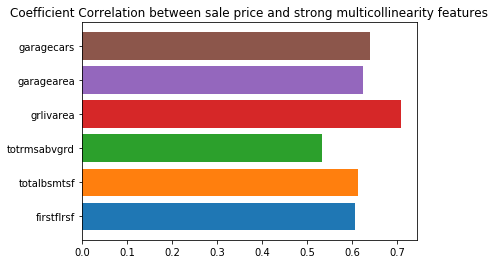

In [12]:
for col in feature_corr_list:
    plt.barh(col,corr.saleprice[col])
    plt.title('Coefficient Correlation between sale price and strong multicollinearity features')

Within each pair of multicollinearity features, I picked the feature that correlated the most with sale price and dropped the other feature from the feature list. 

In [17]:
remove_from_list = ['garagecars', 'totrmsabvgrd', 'firstflrsf', 'exterqual_TA', 'grlivarea']
for col in remove_from_list:
    feature_list.remove(col)


In [18]:
feature_list

['overallqual',
 'yearbuilt',
 'yearremodadd',
 'totalbsmtsf',
 'fullbath',
 'garagearea',
 'bsmtqual_Ex',
 'kitchenqual_Ex',
 'kitchenqual_TA']

In [20]:
model = LinearRegression()

X = housing_df[feature_list]
Y = housing_df['saleprice']

model.fit(X, Y)

print('\nCoefficients: \n', model.coef_)
print('\nIntercept: \n', model.intercept_)


Coefficients: 
 [ 2.12625607e+04 -5.25864821e+01  1.54122164e+02  3.04969937e+01
  2.20351713e+04  5.94737874e+01  3.80298881e+04  3.84860192e+04
 -8.96781182e+03]

Intercept: 
 -247153.72104247808


In [21]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     497.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:59:37   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1450   BIC:                         3.510e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.472e+05   1.37e+05     -1.808      0.071   -5.15e+05    2.09e+04
overallqual     2.126e+04   1221.476     17.407      0.000    1.89e+04    2.37e+04
yearbuilt        -52.5865     47.561     -1.106      0.269    -145.883      40.710
yearremodadd     154.1222     70.146      2.197      0.028      16.524     291.720
totalbsmtsf       30.4970      2.965     10.287      0.000      24.682      36.312
fullbath        2.204e+04   2345.984      9.393      0.000    1.74e+04    2.66e+04
garagearea        59.4738      6.245      9.524      0.000      47.224      71.723
bsmtqual_Ex     3.803e+04   4709.446      8.075      0.000    2.88e+04    4.73e+04
kitchenqual_Ex  3.849e+04   4996.819      7.702      0.000    2.87e+04    4.83e+04
kitchenqual_TA -8967.8118   2716.556     -3.301      0.001   -1.43e+04   -3639.013
==============================================================================
Omnibus:                      417.588   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18707.583
Skew:                           0.552   Prob(JB):                         0.00
Kurtosis:                      20.502   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing the strongly correlated independent features the condition number has dropped from 5.22e+05 to 1.17e+04. Although the warning message still arises and 1.17e+04 is still a large conditon number.